In [7]:
import pandas as pd        # for data manipulation
import numpy as np         # for mathematical calculations
import seaborn as sns      # for data visualization

import matplotlib.pyplot as plt  #for graphical analysis
%matplotlib inline

from scipy.stats import zscore # to remove outliers

from sklearn.preprocessing import StandardScaler  # for normalize the model
from sklearn.preprocessing import LabelEncoder  # to convert object into int


from sklearn.model_selection import train_test_split  # for train and test model

import warnings                      # to ignore any warnings
warnings.filterwarnings("ignore")

from sklearn import metrics  # for model evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, confusion_matrix, classification_report

In [8]:
data=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')  # read the data
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [9]:
# check the no. of rows & column & finding the count of missing value
print(data.shape)

print(data.isna().sum())

#printing the summary of data type
data.info() 

(1470, 35)
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0

In [10]:
#first drop columns then remove duplicates & recheck the size

data.drop('EmployeeCount', axis = 1, inplace = True)
data.drop('StandardHours', axis = 1, inplace = True)
data.drop('EmployeeNumber', axis = 1, inplace = True)
data.drop('Over18', axis = 1, inplace = True)

data.drop_duplicates(inplace=True)

print(data.shape)

(1470, 31)


In [11]:
#understand data at high level check the stastics of dataset
data.describe(include='all')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.000000,1470,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,Male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,882,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,2.721769,NaN,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,1.093082,NaN,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.000000,NaN,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,2.000000,NaN,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,3.000000,NaN,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,4.000000,NaN,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


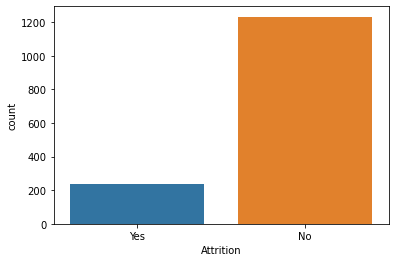

In [12]:
#plot each class frequency
sns.countplot(x='Attrition',data=data)
plt.show()

<AxesSubplot:xlabel='Attrition', ylabel='MonthlyIncome'>

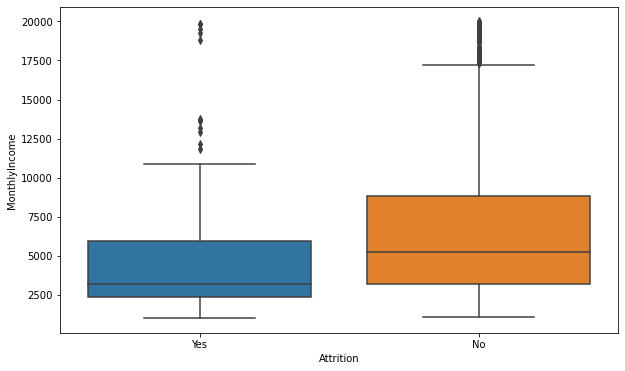

In [13]:
plt.figure(figsize =(10, 6))
sns.boxplot(y ='MonthlyIncome', x ='Attrition', data = data)

In [14]:
# Lets frist covert categorical data into int 
label = LabelEncoder()
df=label.fit_transform(data['Gender']) 
pd.Series(df)
data["Gender"]=df

In [15]:
df=label.fit_transform(data['Attrition']) 
pd.Series(df)
data["Attrition"]=df

In [16]:
df=label.fit_transform(data['OverTime']) 
pd.Series(df)
data["OverTime"]=df

In [17]:
data.tail(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,4,1,...,3,4,0,17,3,2,9,6,0,8
1469,34,0,Travel_Rarely,628,Research & Development,8,3,Medical,2,1,...,3,1,0,6,3,4,4,3,1,2


In [18]:
# lets seaprate the catogorical data & numirical data
numerics=['int8','int16','int32','int64','float16','float32','float64']
cat_col=[] #empty list
features=data.columns.values.tolist()
for i in features:
    if data[i].dtype in numerics:
        continue
    cat_col.append(i)
cat_col

['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']

In [19]:
df_dummies=pd.get_dummies(data[cat_col],drop_first=True)
df_dummies.head(2)


,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [20]:
df_dummies.shape

(1470, 19)

In [21]:
data=data.join(df_dummies) #join to orignal dataset

In [22]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,0,...,0,0,0,0,0,0,1,0,0,1
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,1,...,0,0,0,0,0,1,0,0,1,0
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,1,...,0,1,0,0,0,0,0,0,0,1
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,0,...,0,0,0,0,0,1,0,0,1,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,3,1,...,0,1,0,0,0,0,0,0,1,0
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,4,1,...,0,0,0,0,0,0,0,0,1,0
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,1,...,0,0,0,1,0,0,0,0,1,0
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,4,1,...,0,0,0,0,0,0,1,0,1,0


In [23]:
data.drop(columns=cat_col,axis=1,inplace=True)

In [24]:
data.head(3)

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,2,0,94,3,2,...,0,0,0,0,0,0,1,0,0,1
1,49,0,279,8,1,3,1,61,2,2,...,0,0,0,0,0,1,0,0,1,0
2,37,1,1373,2,2,4,1,92,2,1,...,0,1,0,0,0,0,0,0,0,1


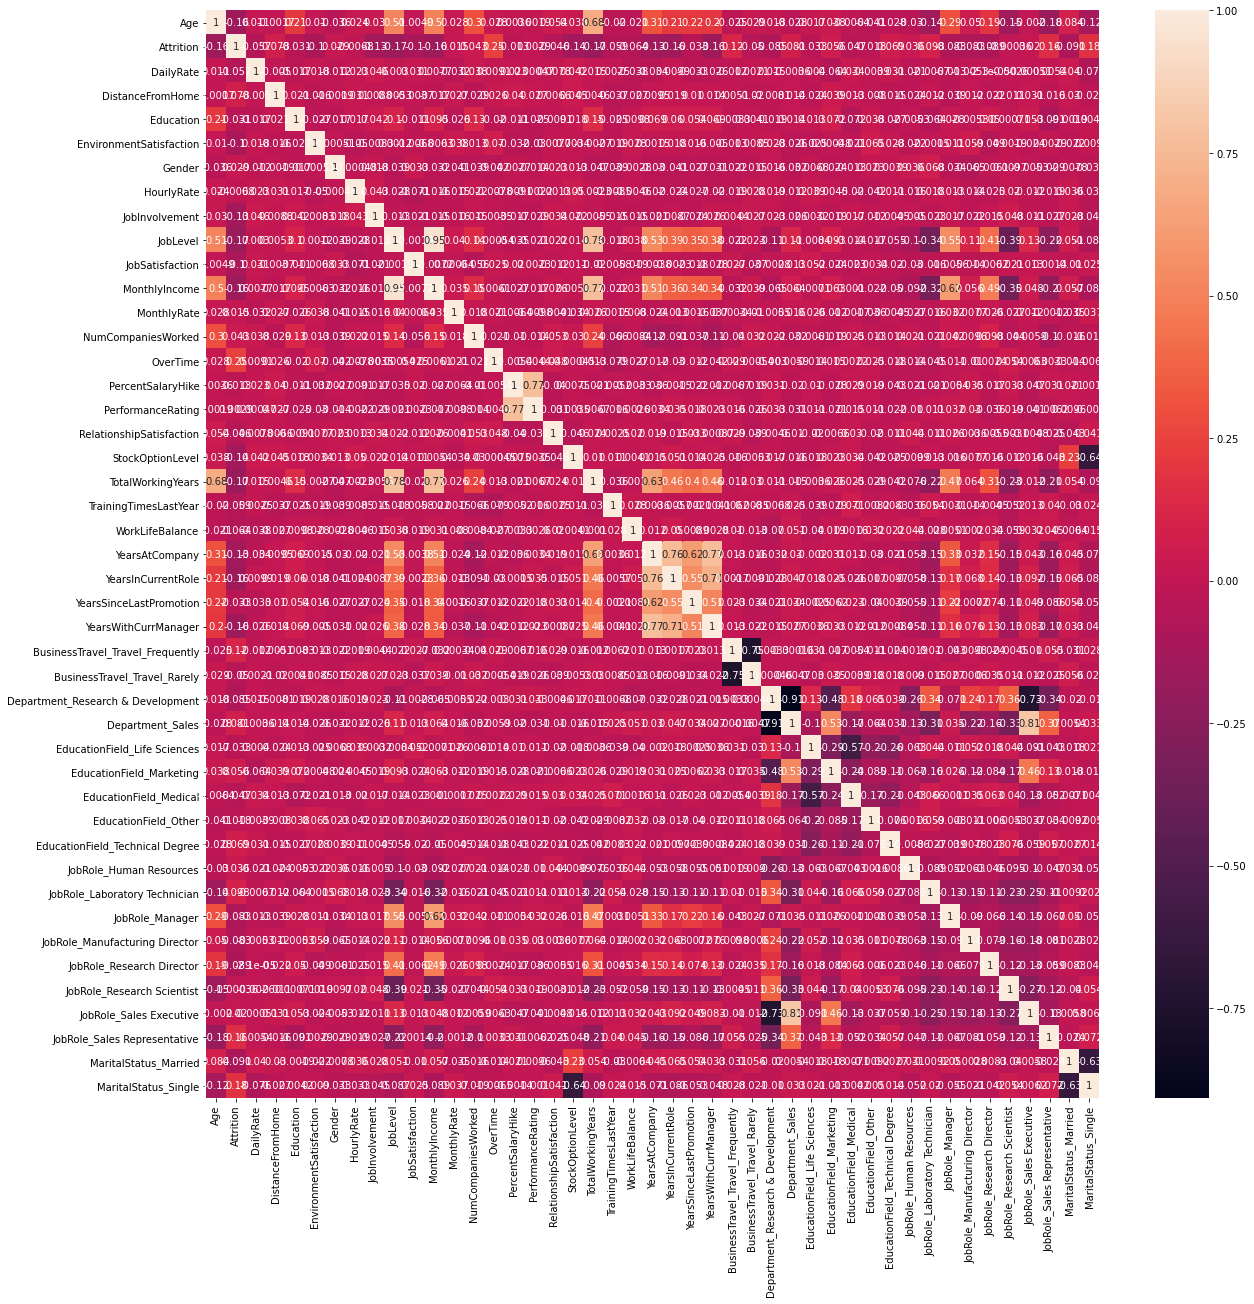

In [25]:
#check multicolinearity
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True,annot_kws={'size':10})
plt.show()

In [26]:
# Let's Seperate the data 
x=data.drop(columns=['Attrition'])
y=data['Attrition']

In [27]:
print(data['Attrition'].value_counts())

0    1233
1     237
Name: Attrition, dtype: int64


In [28]:
# data stadardization
scale=StandardScaler()
x_scaled=scale.fit_transform(x)

In [100]:
#Split data into train & test by using this new fetures
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=355)

In [114]:
# Lets use of Resampling Techniques to handle Imbalanced Data 
from imblearn.over_sampling import SMOTE
from collections import Counter

ove_smp=SMOTE(0.85)
x_train_ns,y_train_ns=ove_smp.fit_sample(x_train,y_train)
print(Counter(y_train))
print(Counter(y_train_ns))

Counter({0: 865, 1: 164})
Counter({0: 865, 1: 735})


# Build Model to predict Attrition

In [105]:
def print_score(model,x_train_ns,x_test,y_train_ns,y_test,train=True):
    if train:
        y_pred=model.predict(x_train_ns)
        print("Train Report:",r2_score(y_train_ns,y_pred))
    elif train==False:
        pred=model.predict(x_test)
        print("Test Report:",accuracy_score(y_test,pred))
        print("Classification Report:",classification_report(y_test,pred))
        print("Confusion Matrix:",confusion_matrix(y_test,pred))

In [106]:
#Below is a function to find the accuracy of each model on the basis of K-fold cross validation.
from sklearn.model_selection import cross_val_score

def model_accuracy(model,X_train=x_train_ns,y_train=y_train_ns):
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv =30)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [107]:
# Model no.1
from sklearn.linear_model import LogisticRegression

LR= LogisticRegression()
LR.fit(x_train_ns,y_train_ns)

print_score(LR,x_train_ns,x_test,y_train_ns,y_test,train=True)
print_score(LR,x_train_ns,x_test,y_train_ns,y_test,train=False)
model_accuracy(LR)

Train Report: 0.32554756006448826
Test Report: 0.7709750566893424
Classification Report:               precision    recall  f1-score   support

           0       0.92      0.79      0.85       368
           1       0.39      0.66      0.49        73

    accuracy                           0.77       441
   macro avg       0.65      0.73      0.67       441
weighted avg       0.83      0.77      0.79       441

Confusion Matrix: [[292  76]
 [ 25  48]]
Accuracy: 81.33 %
Standard Deviation: 4.60 %


In [108]:
# Model no.2
from sklearn.ensemble import RandomForestClassifier

rand_clf= RandomForestClassifier()
rand_clf.fit(x_train_ns,y_train_ns)

print_score(rand_clf,x_train_ns,x_test,y_train_ns,y_test,train=True)
print_score(rand_clf,x_train_ns,x_test,y_train_ns,y_test,train=False)
model_accuracy(rand_clf)

Train Report: 1.0
Test Report: 0.8480725623582767
Classification Report:               precision    recall  f1-score   support

           0       0.86      0.98      0.92       368
           1       0.65      0.18      0.28        73

    accuracy                           0.85       441
   macro avg       0.75      0.58      0.60       441
weighted avg       0.82      0.85      0.81       441

Confusion Matrix: [[361   7]
 [ 60  13]]
Accuracy: 94.12 %
Standard Deviation: 8.77 %


In [109]:
# Model no.3
from sklearn.svm import SVC

svc=SVC()
svc.fit(x_train_ns,y_train_ns)

print_score(svc,x_train_ns,x_test,y_train_ns,y_test,train=True)
print_score(svc,x_train_ns,x_test,y_train_ns,y_test,train=False)
model_accuracy(svc)


Train Report: 0.8943022295623452
Test Report: 0.8458049886621315
Classification Report:               precision    recall  f1-score   support

           0       0.88      0.94      0.91       368
           1       0.55      0.37      0.44        73

    accuracy                           0.85       441
   macro avg       0.72      0.66      0.68       441
weighted avg       0.83      0.85      0.83       441

Confusion Matrix: [[346  22]
 [ 46  27]]
Accuracy: 92.09 %
Standard Deviation: 4.20 %


In [131]:
#Model no.4
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()

dt.fit(x_train_ns,y_train_ns)

print_score(dt,x_train_ns,x_test,y_train_ns,y_test,train=True)
print_score(dt,x_train_ns,x_test,y_train_ns,y_test,train=False)
model_accuracy(dt)

Train Report: 1.0
Test Report: 0.7891156462585034
Classification Report:               precision    recall  f1-score   support

           0       0.86      0.89      0.88       368
           1       0.34      0.30      0.32        73

    accuracy                           0.79       441
   macro avg       0.60      0.59      0.60       441
weighted avg       0.78      0.79      0.78       441

Confusion Matrix: [[326  42]
 [ 51  22]]
Accuracy: 85.69 %
Standard Deviation: 10.37 %


In [111]:
#Model no.5
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()

knn.fit(x_train_ns,y_train_ns)

print_score(knn,x_train_ns,x_test,y_train_ns,y_test,train=True)
print_score(knn,x_train_ns,x_test,y_train_ns,y_test,train=False)
model_accuracy(knn)

Train Report: 0.4765443749754237
Test Report: 0.6575963718820862
Classification Report:               precision    recall  f1-score   support

           0       0.89      0.67      0.77       368
           1       0.27      0.60      0.37        73

    accuracy                           0.66       441
   macro avg       0.58      0.64      0.57       441
weighted avg       0.79      0.66      0.70       441

Confusion Matrix: [[246 122]
 [ 29  44]]
Accuracy: 81.59 %
Standard Deviation: 5.17 %


In [112]:
# Hyper tuning by using GridSearchCV

from sklearn.model_selection import GridSearchCV

para={'C':[0.001,2,3,4,0.1,10],'gamma':[0.25,0.1,0.3,0.4]}
grid=GridSearchCV(estimator=svc, param_grid=para,cv=10)
grid.fit(x_train_ns,y_train_ns)

print(grid.best_params_)

{'C': 2, 'gamma': 0.1}


In [123]:
svc=SVC(C=2,gamma=0.1)
svc.fit(x_train_ns,y_train_ns)

print_score(svc,x_train_ns,x_test,y_train_ns,y_test,train=True)
print_score(svc,x_train_ns,x_test,y_train_ns,y_test,train=False)
model_accuracy(svc)


Train Report: 1.0
Test Report: 0.8299319727891157
Classification Report:               precision    recall  f1-score   support

           0       0.83      0.99      0.91       368
           1       0.00      0.00      0.00        73

    accuracy                           0.83       441
   macro avg       0.42      0.50      0.45       441
weighted avg       0.70      0.83      0.76       441

Confusion Matrix: [[366   2]
 [ 73   0]]
Accuracy: 98.70 %
Standard Deviation: 2.09 %


In [129]:
# Hyper tuning by using RandomizedSearchCV With SVC
from sklearn.model_selection import RandomizedSearchCV

para={'C':[0.001,2,3,4,0.1,10],'gamma':[0.25,0.1,0.3,0.4]}
rand=RandomizedSearchCV(estimator=svc, cv=5,param_distributions=para)
rand.fit(x_train_ns,y_train_ns)

rand.best_params_

{'gamma': 0.3, 'C': 4}

In [130]:
svc=SVC(C=4,gamma=0.3)
svc.fit(x_train_ns,y_train_ns)

print_score(svc,x_train_ns,x_test,y_train_ns,y_test,train=True)
print_score(svc,x_train_ns,x_test,y_train_ns,y_test,train=False)
model_accuracy(svc)


Train Report: 1.0
Test Report: 0.8344671201814059
Classification Report:               precision    recall  f1-score   support

           0       0.83      1.00      0.91       368
           1       0.00      0.00      0.00        73

    accuracy                           0.83       441
   macro avg       0.42      0.50      0.45       441
weighted avg       0.70      0.83      0.76       441

Confusion Matrix: [[368   0]
 [ 73   0]]
Accuracy: 93.81 %
Standard Deviation: 3.51 %


# Looking at accuracy & confusion matrix i m selecting SVC with RandomizedSearchCV  hypertune parameter by using Kfold cross validation method

In [139]:
#save model
import pickle
Filename='Finalized_model.pickle'
pickle.dump(svc,open(Filename,'wb'))